### Library

In [ ]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs

### Data Import

In [ ]:
prod_cat_info = pd.read_csv('https://raw.githubusercontent.com/akhmadiz/runtemp/main/prod_cat_info.csv')
customers = pd.read_csv('https://raw.githubusercontent.com/akhmadiz/runtemp/main/Customer.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/akhmadiz/runtemp/main/Transactions.csv')

In [ ]:
customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [ ]:
customers.customer_Id.nunique()

5647

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [ ]:
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [ ]:
prod_cat_info.shape

(23, 4)

In [ ]:
prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [ ]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [ ]:
transactions.shape

(23053, 10)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


### Merging Data

In [ ]:
df = pd.merge(left = customers, right = transactions, left_on = 'customer_Id', right_on = 'cust_id').drop('cust_id', axis =1)

In [ ]:
df.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store


In [ ]:
df.shape

(23053, 13)

In [ ]:
dfnew = pd.merge(df, prod_cat_info, left_on = ('prod_subcat_code', "prod_cat_code"), right_on = ('prod_sub_cat_code', "prod_cat_code")).drop('prod_sub_cat_code', axis =1)

In [ ]:
dfnew.shape

(23053, 15)

In [ ]:
dfnew['transaction_id'].nunique()

20878

In [ ]:
dfnew.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


### Positive Quantity Data Set

In [ ]:
retail = dfnew[dfnew['Qty'] >= 0]

In [ ]:
retaill = dfnew[dfnew['Qty'] < 0]
print('ukuran data', retaill.shape)
print('transaksi unik', retaill['transaction_id'].nunique())

ukuran data (2177, 15)
transaksi unik 2059


In [ ]:
retail.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [ ]:
retail.shape

(20876, 15)

In [ ]:
retail['transaction_id'].nunique()

20876

### Data Preprocessing

In [ ]:
from datetime import timedelta
import datetime as dt
import time
import os

In [ ]:
retail['tran_date'] = pd.to_datetime(retail['tran_date'], errors='coerce')
retail['DOB'] = pd.to_datetime(retail['DOB'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
retail.insert(loc=6, column='year', value= retail.tran_date.dt.year)

In [ ]:
retail.insert(loc=7, column='month', value= retail.tran_date.dt.month)

In [ ]:
retail.insert(loc=8, column='day', value=(retail.tran_date.dt.day_name()))

In [ ]:
retail.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,2014,1,Monday,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2011,3,Friday,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2011,5,Monday,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,2013,9,Thursday,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,2013,5,Thursday,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


### Duplicated Value

In [ ]:
retail.duplicated().sum()

0

### Missing Value

In [ ]:
#imputing missing values
retail.isnull().sum()

customer_Id         0
DOB                 0
Gender              8
city_code           8
transaction_id      0
tran_date           0
year                0
month               0
day                 0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

Dropping missing value

In [ ]:
retail.dropna()
retail.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,2014,1,Monday,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2011,3,Friday,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2011,5,Monday,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,2013,9,Thursday,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,2013,5,Thursday,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


### Outliers Detection

In [ ]:
retail.describe()

,customer_Id,city_code,transaction_id,year,month,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,20876.000000,20868.000000,2.087600e+04,20876.000000,20876.000000,20876.000000,20876.000000,20876.000000,20876.000000,20876.000000,20876.000000
mean,271027.141981,5.473740,5.000701e+10,2012.113192,6.499329,6.156639,3.761496,3.003497,785.927764,247.861232,2608.444389
std,2433.338935,2.864394,2.896115e+10,0.893235,3.475554,3.722363,1.675859,1.420479,415.586498,186.644248,1964.208517
min,266783.000000,1.000000,3.268991e+06,2011.000000,1.000000,1.000000,1.000000,1.000000,70.000000,7.350000,77.350000
25%,268938.000000,3.000000,2.487089e+10,2011.000000,3.000000,3.000000,2.000000,2.000000,426.000000,97.938750,1030.688750
50%,271004.000000,5.000000,5.007968e+10,2012.000000,7.000000,5.000000,4.000000,3.000000,788.000000,198.555000,2089.555000
75%,273122.250000,8.000000,7.512409e+10,2013.000000,10.000000,10.000000,5.000000,4.000000,1148.000000,363.510000,3825.510000
max,275265.000000,10.000000,9.998755e+10,2014.000000,12.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


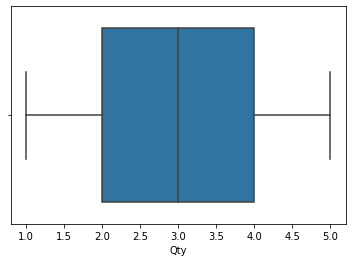

In [ ]:
import seaborn as sns
plt.figure()
sns.boxplot(x=retail['Qty'])
plt.show()

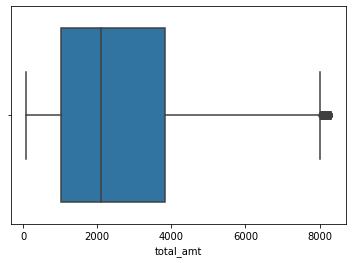

In [ ]:
plt.figure()
sns.boxplot(x=retail['total_amt'])
plt.show()

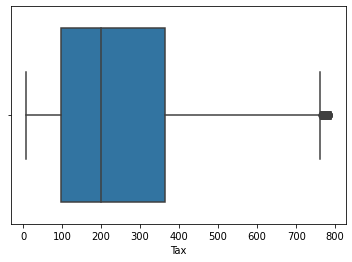

In [ ]:
plt.figure()
sns.boxplot(x=retail['Tax'])
plt.show()

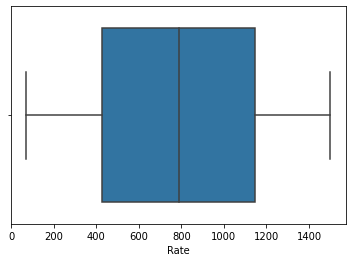

In [ ]:
plt.figure()
sns.boxplot(x=retail['Rate'])
plt.show()

Perlu hitung banyak outliernya

In [ ]:
q1 = (retail[['Tax','total_amt']]).quantile(0.25)
q3 = (retail[['Tax','total_amt']]).quantile(0.75)
iqr = q3-q1
max = q3 + (1.5*iqr)
min = q1 - (1.5*iqr)
retail['Tax'].mask(retail['Tax']>max['Tax'],max['Tax'],inplace=True)
retail['total_amt'].mask(retail['total_amt']>max['total_amt'],max['total_amt'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:9005: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:9005: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast


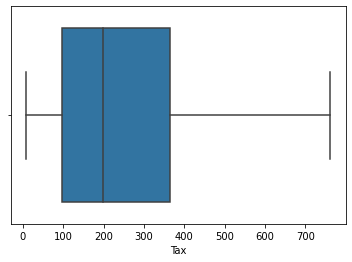

In [ ]:
plt.figure()
sns.boxplot(x=retail['Tax'])
plt.show()

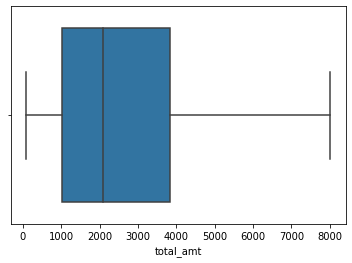

In [ ]:
plt.figure()
sns.boxplot(x=retail['total_amt'])
plt.show()

### Data Viz

#### Orders Per Store Category

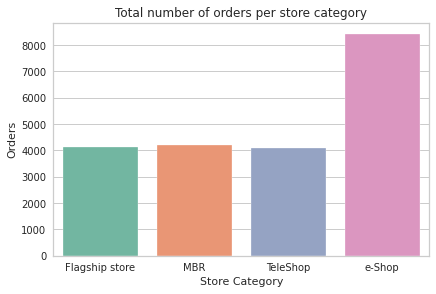

In [ ]:
"""The e-shop accounted for the most returns in the orders dataset."""
orders = retail.groupby(by=['Store_type'], as_index = False)['Qty'].count()
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
sns.barplot(x = "Store_type", y = 'Qty', data = orders,  palette= "Set2")
plt.xlabel('Store Category')
plt.ylabel('Orders')
plt.title('Total number of orders per store category')
plt.show()

#### Orders Per Product Category

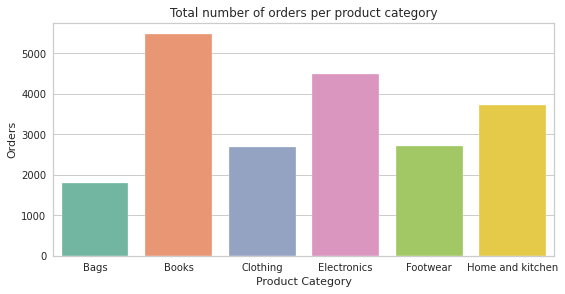

In [ ]:
"""Books, Electronics and Home & Kitchen were the most product categories."""
category = retail.groupby(by=['prod_cat'], as_index = False)['Qty'].count()
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot(x = "prod_cat", y = 'Qty', data = category,  palette= "Set2")
plt.xlabel('Product Category')
plt.ylabel('Orders')
plt.title('Total number of orders per product category')
plt.show()

#### Orders By City

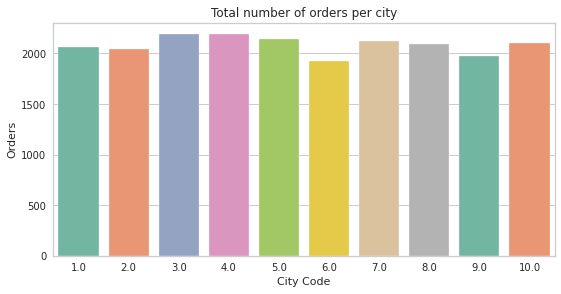

In [ ]:
"""Order across cities were quite similar, with the highest recorded for City Code 8."""
city = retail.groupby(by= ['city_code'], as_index = False)['Qty'].count()
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot(x = "city_code", y = 'Qty', data = city,  palette= "Set2")
plt.xlabel('City Code')
plt.ylabel('Orders')
plt.title('Total number of orders per city')
plt.show()

#### Orders By Year



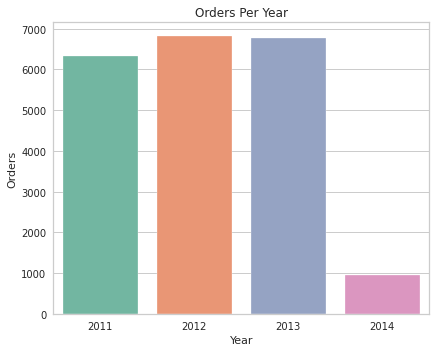

In [ ]:
order_year = retail.groupby(by=['year'], as_index = False)['Qty'].count()
plt.figure(figsize=(6,5))
sns.barplot(x = "year", y = 'Qty', data = order_year,  palette= "Set2")
plt.xlabel('Year')
plt.ylabel('Orders')
plt.title('Orders Per Year')
plt.show()

#### Orders By Month



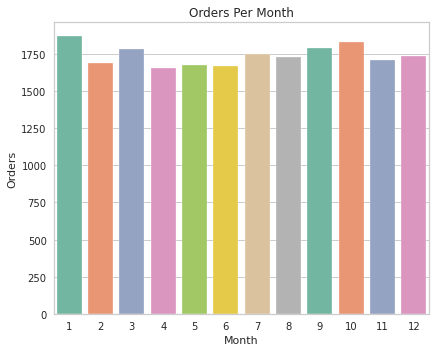

In [ ]:
order_year = retail.groupby(by=['month'], as_index = False)['Qty'].count()
plt.figure(figsize=(6,5))
sns.barplot(x = "month", y = 'Qty', data = order_year,  palette= "Set2")
plt.xlabel('Month')
plt.ylabel('Orders')
plt.title('Orders Per Month')
plt.show()

#### Orders By Day



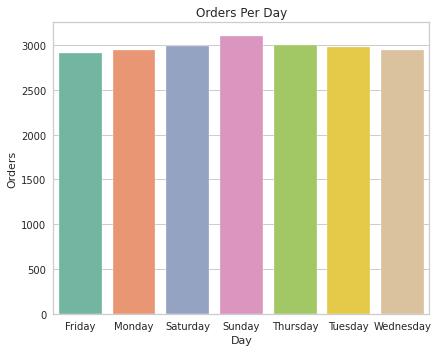

In [ ]:
order_year = retail.groupby(by=['day'], as_index = False)['Qty'].count()
plt.figure(figsize=(6,5))
sns.barplot(x = "day", y = 'Qty', data = order_year,  palette= "Set2")
plt.xlabel('Day')
plt.ylabel('Orders')
plt.title('Orders Per Day')
plt.show()

#### Revenue By Time



In [ ]:
retail4=retail.copy()

In [ ]:
retail4['order_month'] = retail4['tran_date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
retail4.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,order_month
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,2014,1,Monday,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,2014-01
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2011,3,Friday,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,2011-03
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2011,5,Monday,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,2011-05
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,2013,9,Thursday,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,2013-09
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,2013,5,Thursday,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,2013-05


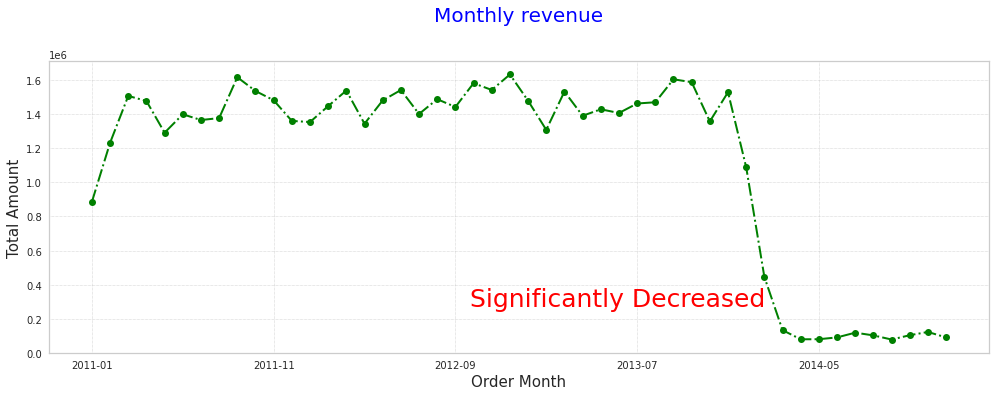

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 5))
retail4.groupby(['order_month'])['total_amt'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly revenue', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.text(0.47, 0.2, 'Significantly Decreased', transform=fig.transFigure, color='red', fontsize=25)
plt.show()

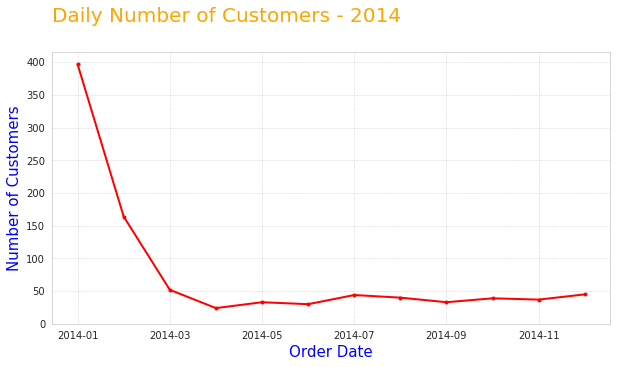

In [ ]:
plt.figure(figsize=(10, 5))
retail4[retail4['order_month']>='2014-01'].groupby(['order_month'])['customer_Id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - 2014', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

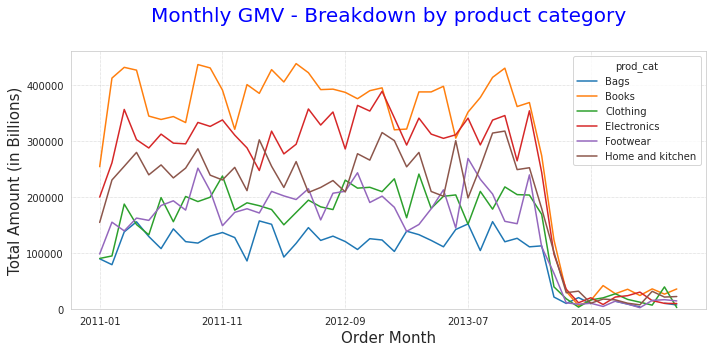

In [ ]:
retail4.groupby(['order_month','prod_cat'])['total_amt'].sum().unstack().plot()
plt.title('Monthly GMV - Breakdown by product category', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray', linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

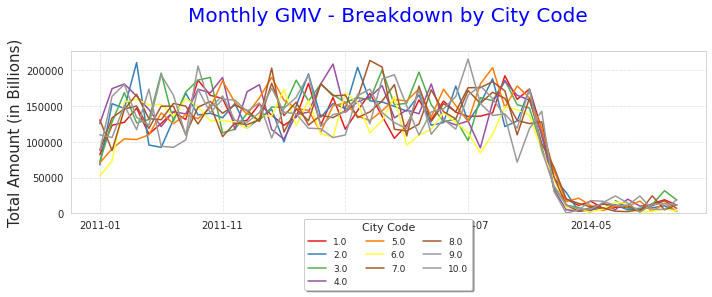

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
retail4.groupby(['order_month','city_code'])['total_amt'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV - Breakdown by City Code', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5), shadow=True,ncol=3, title='City Code', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

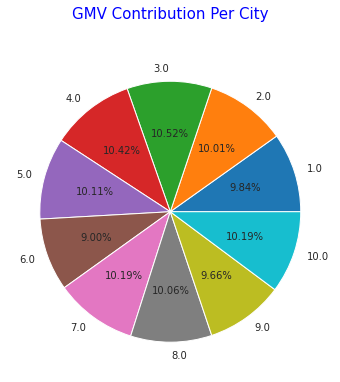

In [ ]:
import matplotlib.pyplot as plt
gmv_per_city = retail4.groupby('city_code')['total_amt'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city['total_amt'], labels = gmv_per_city['city_code'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

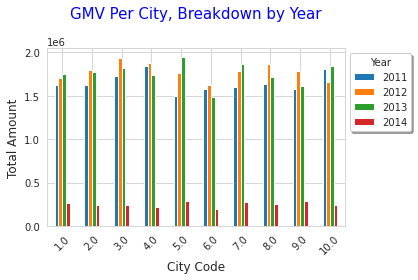

In [ ]:
import matplotlib.pyplot as plt
retail4.groupby(['city_code','year'])['total_amt'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Year', loc='center',pad=30,fontsize=15,color='blue')
plt.xlabel('City Code',fontsize=12)
plt.ylabel('Total Amount',fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True,title='Year')
plt.ylim(ymin=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Revenue Generated

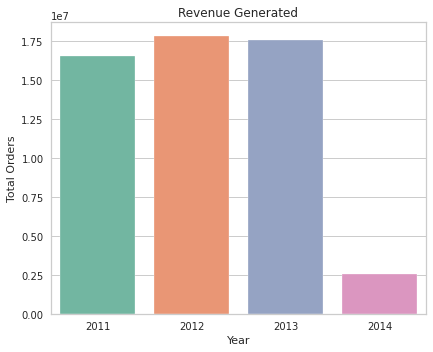

In [ ]:
sales1 = retail.groupby(by=['year'], as_index = False)['total_amt'].sum()
plt.figure(figsize=(6,5))
sns.barplot(x = "year", y = 'total_amt', data = sales1,  palette= "Set2")
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Revenue Generated')
plt.show()

#### Revenue Per Category

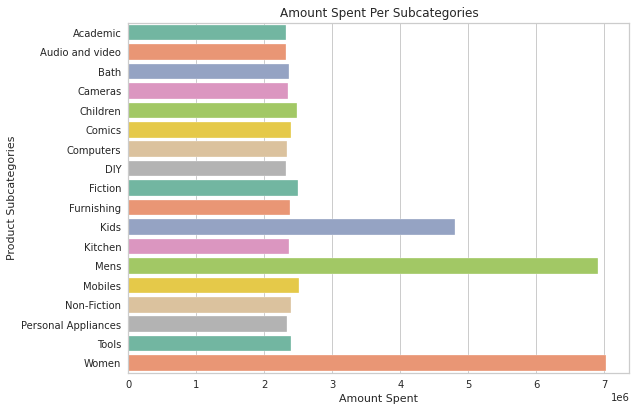

In [ ]:
subcategory = retail.groupby(by=['prod_subcat'], as_index = False)['total_amt'].sum()
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x = "total_amt", y = 'prod_subcat', data = subcategory, palette= "Set2")
plt.xlabel('Amount Spent')
plt.ylabel('Product Subcategories')
plt.title('Amount Spent Per Subcategories')
plt.show()

#### Purchase By Gender

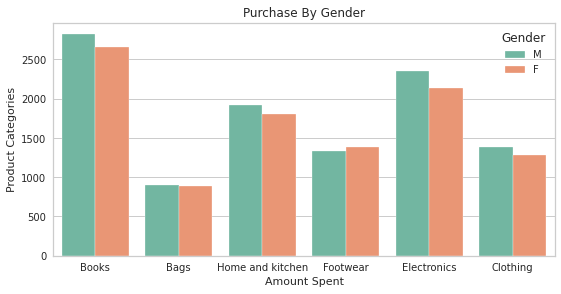

In [ ]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x = 'prod_cat', hue = "Gender", data = retail, palette= "Set2")
plt.xlabel('Amount Spent')
plt.ylabel('Product Categories')
plt.title('Purchase By Gender')
plt.show()

#### Quantity Sold By Day

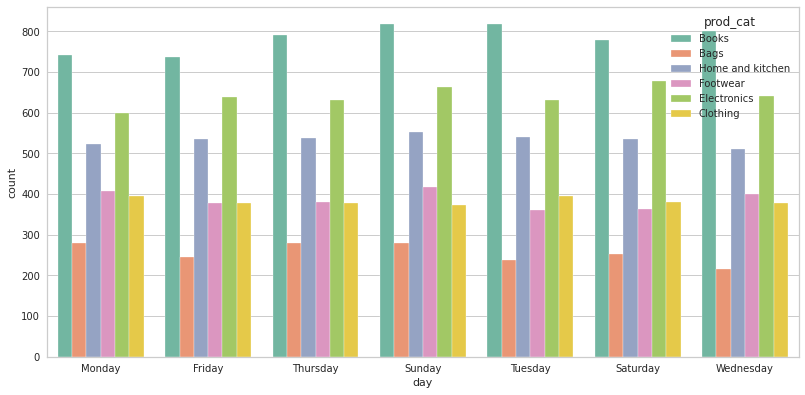

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'day', hue = 'prod_cat', data = retail, palette= "Set2")

# sale_by_day = retail.groupby(['day','prod_cat'])['Qty'].count().reset_index()
# sale_by_day.pivot(index = "day", columns = "prod_cat", values = 'Qty').round(0)

# retail['month'].value_counts()

#### Purchase By Age Category

##### age category

In [ ]:
np.timedelta64(100, 'Y')

numpy.timedelta64(100,'Y')

In [ ]:
now = retail['tran_date'].max()
now

Timestamp('2014-12-02 00:00:00')

In [ ]:
retail2=retail.copy()
retail2.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,2014,1,Monday,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2011,3,Friday,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2011,5,Monday,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,2013,9,Thursday,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,2013,5,Thursday,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [ ]:
retail2['DOB'] = retail2['DOB'].where(retail2['DOB'] < now, retail2['DOB'] -  np.timedelta64(100, 'Y'))   # 2
retail2.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,2014,1,Monday,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2011,3,Friday,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2011,5,Monday,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,2013,9,Thursday,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,2013,5,Thursday,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [ ]:
retail2['AGE'] = (now - retail2['DOB']).astype('<m8[Y]').round()

In [ ]:
retail2.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,2014,1,Monday,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,44.0
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2011,3,Friday,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,44.0
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2011,5,Monday,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,44.0
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,2013,9,Thursday,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,44.0
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,2013,5,Thursday,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,44.0


In [ ]:
retail2.sample()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE
15602,274568,1984-12-09,F,9.0,21300411973,2013-12-31,2013,12,Tuesday,2,6,1,1054,110.67,1164.67,Flagship store,Home and kitchen,Furnishing,29.0


In [ ]:
retail3=retail.copy()
retail3['AGE'] = (now - retail3['DOB']).astype('<m8[Y]').round()
retail3.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,2014,1,Monday,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,44.0
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,2011,3,Friday,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,44.0
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,2011,5,Monday,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,44.0
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,2013,9,Thursday,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,44.0
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,2013,5,Thursday,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,44.0


In [ ]:
retail3.iloc[15808,-1]

35.0

**PERTANYAAN**

KENAPA HARUS DIKURANG np.timedelta64(100,y)

In [ ]:
print(retail2['AGE'].max())
print(retail2['AGE'].min())

44.0
21.0


In [ ]:
retail2['age_category'] = pd.cut(x = retail2['AGE'], bins = [21, 28, 34, 44], labels=['21-28','29-34','35-44'],include_lowest=True)

In [ ]:
retail2.sample(5)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,AGE,age_category
1028,274723,1992-07-07,F,8.0,92343997558,2011-09-26,2011,9,Monday,7,5,1,184,19.320,203.320,e-Shop,Books,Fiction,22.0,21-28
10170,268924,1973-08-16,F,3.0,77862818211,2012-12-18,2012,12,Tuesday,3,1,5,860,451.500,4751.500,MBR,Clothing,Kids,41.0,35-44
19001,266997,1970-01-23,M,9.0,4048667970,2013-08-30,2013,8,Friday,3,5,3,1427,449.505,4730.505,e-Shop,Books,Comics,44.0,35-44
18105,271407,1972-05-23,F,2.0,60263267714,2013-08-02,2013,8,Friday,4,1,4,1229,516.180,5432.180,e-Shop,Clothing,Mens,42.0,35-44
11692,267382,1986-02-04,M,2.0,95632975267,2012-07-27,2012,7,Friday,11,5,1,457,47.985,504.985,MBR,Books,Children,28.0,21-28


In [ ]:
retail2['age_category'].value_counts()

35-44    9005
21-28    6539
29-34    5332
Name: age_category, dtype: int64

##### Viz

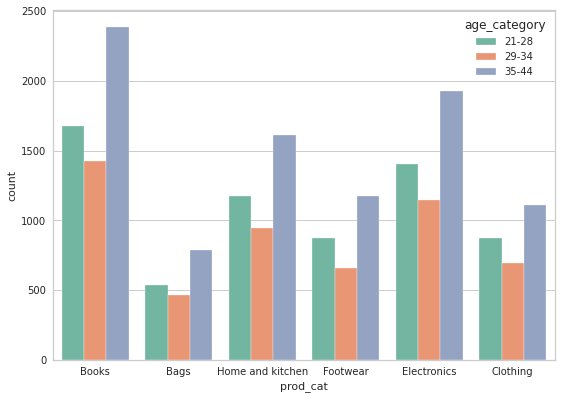

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'prod_cat', hue = 'age_category', data = retail2, palette= "Set2")

####  Quantity Sold By Month

In [ ]:
# plt.figure(figsize=(12,6))
# sns.countplot(x = 'prod_cat', hue = 'month', data = retail, palette= "plasma")

# sale_by_month = retail.groupby(['month','prod_cat'])['Qty'].count().reset_index()
# sale_by_month.pivot(index = "month", columns = "prod_cat", values = 'Qty').round(0)

# retail['month'].value_counts()

# RFM SCORE

In [ ]:

retail3['tran_date'].min()
retail3['tran_date'].max()


rfmTable =retail3.groupby('customer_Id').agg({'tran_date': lambda x: (now- x.max()).days, 'transaction_id': lambda x: len(x), 'total_amt': lambda x: x.sum()})

rfmTable['tran_date'] = rfmTable['tran_date'].astype(int)

rfmTable.rename(columns={'tran_date': 'recency', 
                         'transaction_id': 'frequency', 
                         'total_amt': 'monetary_value'}, inplace=True)

rfmTable.head()

,recency,frequency,monetary_value
customer_Id,,,
266783,456,4,8952.710
266784,814,3,5694.065
266785,657,7,28442.700
266788,365,4,6092.970
266794,0,11,28117.830


In [ ]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5506 entries, 266783 to 275265
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   recency         5506 non-null   int64  
 1   frequency       5506 non-null   int64  
 2   monetary_value  5506 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 172.1 KB


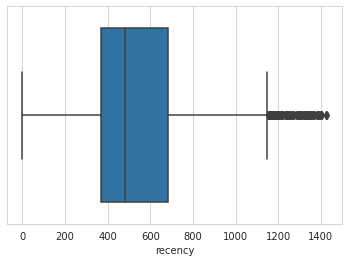

In [ ]:
plt.figure()
sns.boxplot(x=rfmTable['recency'])
plt.show()

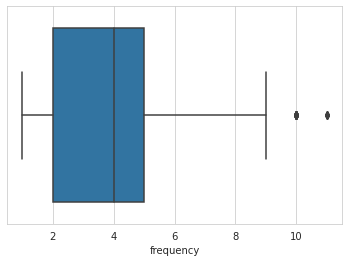

In [ ]:
plt.figure()
sns.boxplot(x=rfmTable.frequency)
plt.show()

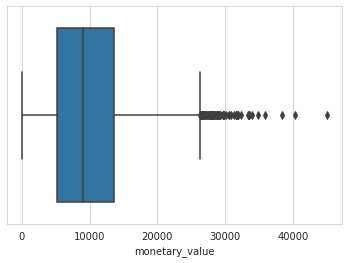

In [ ]:
plt.figure()
sns.boxplot(x=rfmTable.monetary_value)
plt.show()

Standardisasi


In [ ]:
#standardisasi
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(rfmTable)
RFM = scaler.transform(rfmTable)
RFM = pd.DataFrame(RFM)

In [ ]:
RFM.head()

,0,1,2
0,-0.345234,0.113597,-0.151394
1,1.024068,-0.431234,-0.680011
2,0.423564,1.748091,3.010271
3,-0.693297,0.113597,-0.615301
4,-2.089373,3.927416,2.957571


In [ ]:
RFM.rename(columns={0: 'recency', 
                         1: 'frequency', 
                         2: 'monetary_value'}, inplace=True)
RFM.head()

,recency,frequency,monetary_value
0,-0.345234,0.113597,-0.151394
1,1.024068,-0.431234,-0.680011
2,0.423564,1.748091,3.010271
3,-0.693297,0.113597,-0.615301
4,-2.089373,3.927416,2.957571


# elbow method

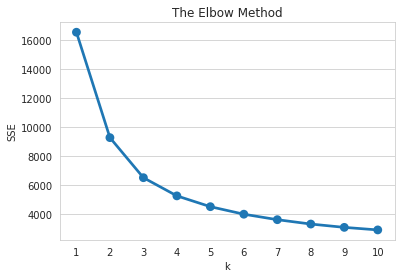

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(RFM)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()



```
# This is formatted as code
```

# Sillhoutte Method

In [ ]:
RFM_test1=RFM.copy()

In [ ]:
RFM_test1.head()

,recency,frequency,monetary_value
0,-0.345234,0.113597,-0.151394
1,1.024068,-0.431234,-0.680011
2,0.423564,1.748091,3.010271
3,-0.693297,0.113597,-0.615301
4,-2.089373,3.927416,2.957571


In [ ]:
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=2)
model.fit(RFM_test1)
label=model.predict(RFM_test1)
print(f'Silhouette Score(n=2): {silhouette_score(RFM_test1, label)}')

Silhouette Score(n=2): 0.372729136110826


In [ ]:
# RFM_test2=RFM.copy()

model = KMeans(n_clusters=3)
model.fit(RFM_test1)
label=model.predict(RFM_test1)
print(f'Silhouette Score(n=3): {silhouette_score(RFM_test1, label)}')

Silhouette Score(n=3): 0.34608591562837115


In [ ]:
# RFM_test3=RFM.copy()

model = KMeans(n_clusters=3)
model.fit(RFM_test1)
label=model.predict(RFM_test1)
print(f'Silhouette Score(n=2): {silhouette_score(RFM_test1, label)}')

Silhouette Score(n=2): 0.3459995081816364


# Clustering fix

In [ ]:
#k=2
model = KMeans(n_clusters=2)
model.fit(RFM)
model.labels_.shape
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
RFM["Cluster"] = model.labels_
RFM_cluster = RFM.groupby('Cluster').agg({
    'frequency':'mean',
    'monetary_value':'mean',
    'recency':'mean'}).round(2)
RFM_cluster

,frequency,monetary_value,recency
Cluster,,,
0,0.86,0.84,-0.50
1,-0.67,-0.65,0.39


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


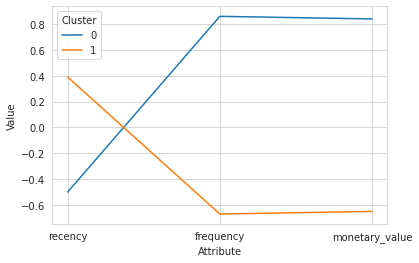

In [ ]:
RFMfix = pd.melt(RFM_cluster.reset_index(),
                      id_vars=['Cluster'],
                      value_vars=['recency','frequency','monetary_value'],
                      var_name='Attribute',
                      value_name='Value')
# Visualize it
plt.clf()
sns.lineplot('Attribute', 'Value', hue='Cluster', data = RFMfix)

In [ ]:
RFM['Cluster'].value_counts()

1    3098
0    2408
Name: Cluster, dtype: int64

In [ ]:
## k =3
model2 = KMeans(n_clusters=3)
model2.fit(RFM)
model2.labels_.shape
model2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
RFM2 = RFM.copy()

In [ ]:
RFM2["Cluster"] = model2.labels_
RFM2_cluster = RFM2.groupby('Cluster').agg({
    'frequency':'mean',
    'monetary_value':'mean',
    'recency':'mean'}).round(2)
RFM2_cluster

,frequency,monetary_value,recency
Cluster,,,
0,0.90,0.88,-0.47
1,-0.91,-0.75,1.64
2,-0.53,-0.59,-0.25


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


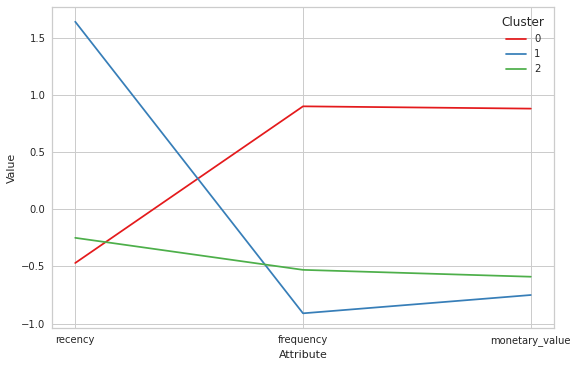

In [ ]:
#-------------------HASIL CLUSTER FIX--------------------#
RFMfix2 = pd.melt(RFM2_cluster.reset_index(),
                      id_vars=['Cluster'],
                      value_vars=['recency','frequency','monetary_value'],
                      var_name='Attribute',
                      value_name='Value')
# Visualize it
plt.clf()
sns.lineplot('Attribute', 'Value', hue='Cluster', palette='Set1', data = RFMfix2)

### uji performa klaster melalui SSE

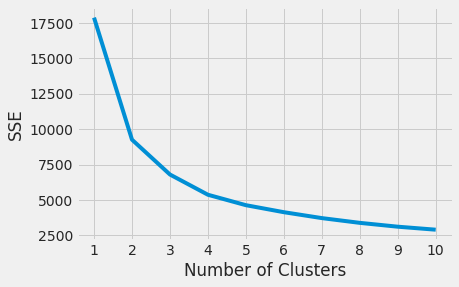

In [ ]:
#---------------------UJI PERFORMA KALSMELALUI SSE----------------#

kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300,"random_state": 42}
 
sse = []
for k in range(1, 11):
      kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
      kmeans.fit(RFM)
      sse.append(kmeans.inertia_)
 
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow #kluster optimal

3

In [ ]:
RFM2.Cluster.value_counts()

0    2319
2    2183
1    1004
Name: Cluster, dtype: int64

In [ ]:
## k = 4
## TIDAK OPTIMAL
RFM3 = RFM.copy()
model3 = KMeans(n_clusters=4)
model3.fit(RFM3)
model3.labels_.shape
model3

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
RFM3["Cluster"] = model3.labels_
RFM3_cluster = RFM3.groupby('Cluster').agg({
    'frequency':'mean',
    'monetary_value':'mean',
    'recency':'mean'}).round(2)
RFM3_cluster

,frequency,monetary_value,recency
Cluster,,,
0,1.63,1.72,-0.54
1,-0.92,-0.75,1.66
2,-0.55,-0.61,-0.20
3,0.52,0.45,-0.48


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


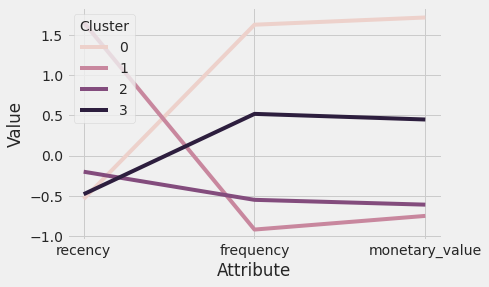

In [ ]:
RFMfix3 = pd.melt(RFM3_cluster.reset_index(),
                      id_vars=['Cluster'],
                      value_vars=['recency','frequency','monetary_value'],
                      var_name='Attribute',
                      value_name='Value')
# Visualize it
plt.clf()
sns.lineplot('Attribute', 'Value', hue='Cluster', data = RFMfix3)

## VISUALIZER SILLHOUETTE


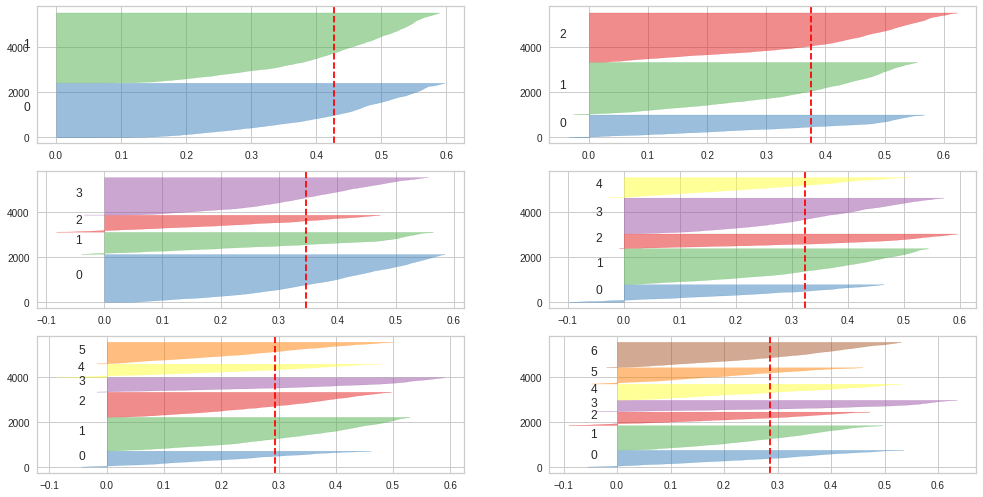

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(RFM)